In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("datasets/user_profiles_for_ads.csv")

In [7]:
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [11]:
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values_report = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})
print(missing_values_report)

                                 Missing Values Data Type
User ID                                       0     int64
Age                                           0    object
Gender                                        0    object
Location                                      0    object
Language                                      0    object
Education Level                               0    object
Likes and Reactions                           0     int64
Followed Accounts                             0     int64
Device Usage                                  0    object
Time Spent Online (hrs/weekday)               0   float64
Time Spent Online (hrs/weekend)               0   float64
Click-Through Rates (CTR)                     0   float64
Conversion Rates                              0   float64
Ad Interaction Time (sec)                     0     int64
Income Level                                  0    object
Top Interests                                 0    object


## Demographics

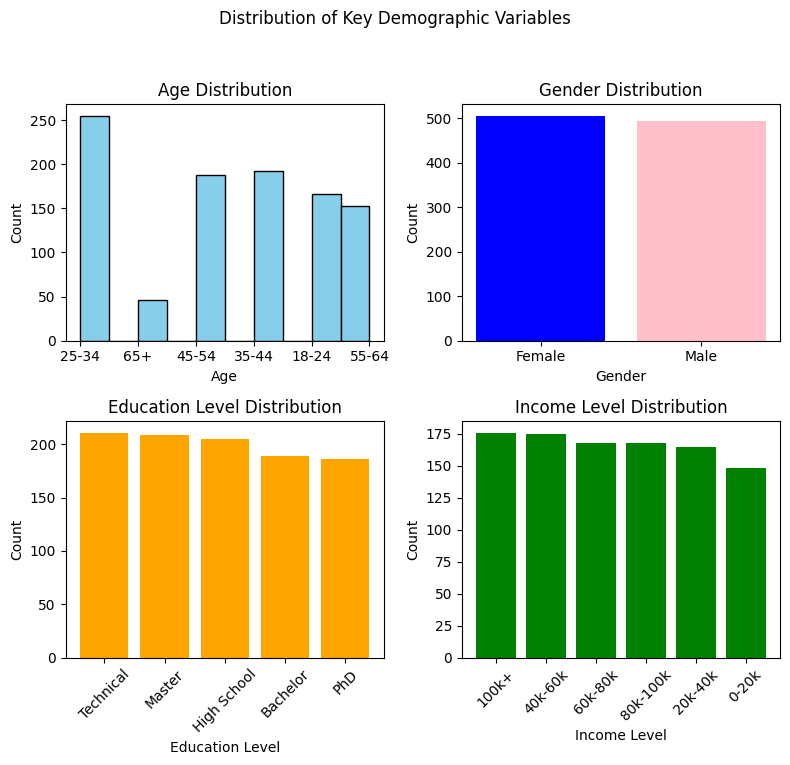

In [15]:
# setting the aesthetic style of the plots (optional)
# plt.style.use('seaborn-whitegrid')

# creating subplots for the demographic distributions
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Distribution of Key Demographic Variables')

# age distribution
axes[0, 0].hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# gender distribution
gender_counts = data['Gender'].value_counts()
axes[0, 1].bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# education level distribution
education_counts = data['Education Level'].value_counts()
axes[1, 0].bar(education_counts.index, education_counts.values, color='orange')
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# income level distribution
income_counts = data['Income Level'].value_counts()
axes[1, 1].bar(income_counts.index, income_counts.values, color='green')
axes[1, 1].set_title('Income Level Distribution')
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Device Usage

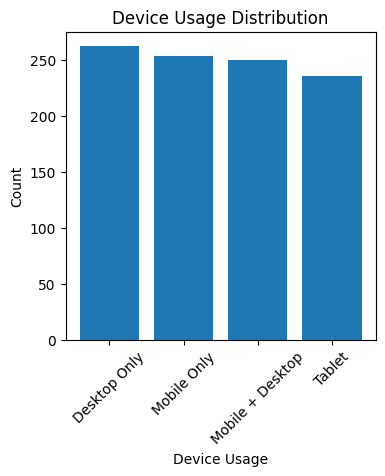

In [21]:
device_counts = data['Device Usage'].value_counts()
fig, ax = plt.subplots(figsize=(4, 4))

ax.bar(device_counts.index, device_counts.values)

# Set title and labels
ax.set_title('Device Usage Distribution')
ax.set_xlabel('Device Usage')
ax.set_ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

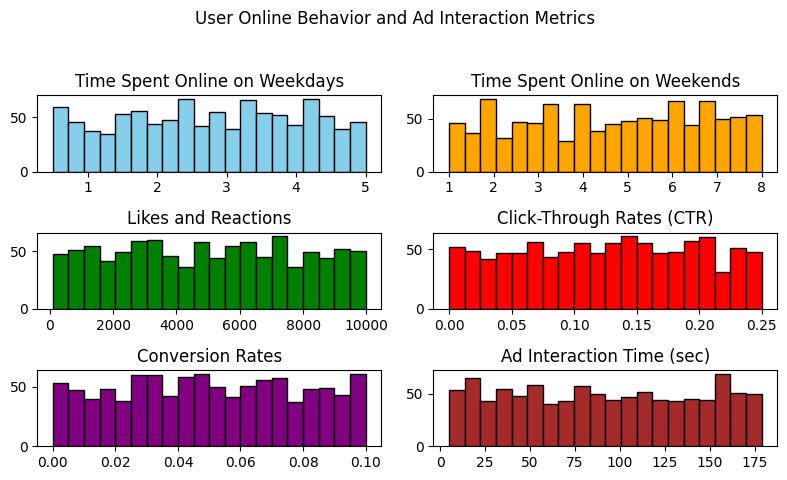

In [26]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(8, 5))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# Plot histograms for each column
axes[0, 0].hist(data['Time Spent Online (hrs/weekday)'], bins=20, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Time Spent Online on Weekdays')

axes[0, 1].hist(data['Time Spent Online (hrs/weekend)'], bins=20, edgecolor='black', color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends')

axes[1, 0].hist(data['Likes and Reactions'], bins=20, edgecolor='black', color='green')
axes[1, 0].set_title('Likes and Reactions')

axes[1, 1].hist(data['Click-Through Rates (CTR)'], bins=20, edgecolor='black', color='red')
axes[1, 1].set_title('Click-Through Rates (CTR)')

axes[2, 0].hist(data['Conversion Rates'], bins=20, edgecolor='black', color='purple')
axes[2, 0].set_title('Conversion Rates')

axes[2, 1].hist(data['Ad Interaction Time (sec)'], bins=20, edgecolor='black', color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [34]:
from collections import Counter

interests_list = data['Top Interests'].str.split(', ').sum()
interests_counter = Counter(interests_list)
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)
interests_df = interests_df.reset_index(drop=True)


,Interest,Frequency
0,Digital Marketing,182
1,Investing and Finance,171
2,Music Production,169
3,Fitness and Wellness,167
4,Eco-Friendly Living,163
5,Fashion Modelling,161
6,Gourmet Cooking,157
7,Reading and Literature,156
8,Gaming,155
9,Pet Care,155


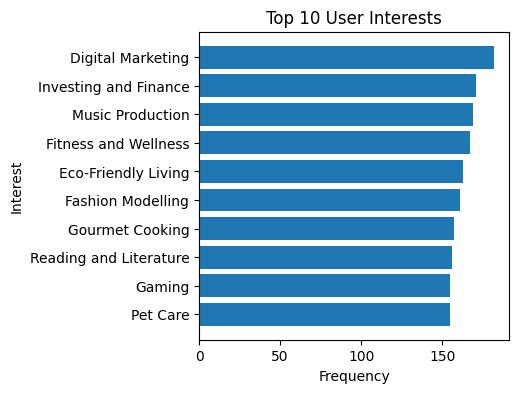

In [37]:
top_interests_df = interests_df.head(10)

# Plotting the most common interests using Matplotlib
plt.figure(figsize=(4, 4))
plt.barh(top_interests_df['Interest'], top_interests_df['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.title('Top 10 User Interests')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [39]:
features = [
    'Age', 
    'Gender', 
    'Income Level', 
    'Time Spent Online (hrs/weekday)', 
    'Time Spent Online (hrs/weekend)', 
    'Likes and Reactions', 
    'Click-Through Rates (CTR)'
]

X = data[features]

# defining preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels


In [44]:
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,2
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,1
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,0
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",3
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",2


In [47]:
cluster_means = data.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

cluster_means

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Age,Gender,Income Level
Cluster,,,,,,,
0,3.911111,5.212963,2409.620370,0.149588,25-34,Female,80k-100k
1,1.559394,6.002424,5005.121212,0.179836,35-44,Male,80k-100k
2,3.019737,2.584211,6861.587719,0.170614,25-34,Male,20k-40k
3,3.080882,5.774510,7457.602941,0.067971,25-34,Female,100k+
4,1.809626,3.839572,3021.219251,0.056594,45-54,Female,0-20k


- Cluster 0 – “Weekend Warriors”:
  - High weekend online activity
  - Moderate likes and reactions
  - Predominantly male
  - Age group 25-34
  - Income level 80k-100k

- Cluster 1 – “Engaged Professionals”:
  - Balanced online activity
  - High likes and reactions
  - Predominantly male
  - Age group 25-34
  - High income (100k+)

- Cluster 2 – “Low-Key Users”:
  - Moderate to high weekend online activity
  - Moderate likes and reactions
  - Predominantly male
  - Age group 25-34
  - Income level 60k-80k
  - Lower CTR

- Cluster 3 – “Active Explorers”:
  - High overall online activity
  - Lower likes and reactions
  - Predominantly female
  - Age group 25-34
  - Income level 60k-80k

- Cluster 4 – “Budget Browsers”:
  - Moderate online activity
  - Lowest likes and reactions
  - Predominantly female
  - Age group 25-34
  - Lowest income level (0-20k)
  - Lower CTR
